## 0. Loading required data

In [1]:
import pandas as pd
import numpy as np 
from sklearn.metrics import f1_score
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

# Settings for the visualizations
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
clients = pd.read_csv('mwc22-client_table.csv', decimal=',')
orders = pd.read_csv('mwc22-orders_table.csv', decimal=',')

## 1. Understanding the data

### Client table analisis

*------------------------------------------------------------------------------------------------------------------------------------------*

**CLIENT ID:** Identificador único del cliente 

**CLIENT_SEGMENT:** Segmento de clientes

**AVG CONSO:** Consumo medio mensual del cliente calculado a finales de 2020 (en piezas de fruta)

**AVG BASKET SIZE:** Tamaño medio de la cesta del cliente calculado a finales de 2020 (en piezas de fruta)

**RECEIVED_COMMUNICATION:** 1 = Recibió promoción de sus productos / 0 = no la recibió

*------------------------------------------------------------------------------------------------------------------------------------------*

In [3]:
clients.columns = [c.replace(' ', '_') for c in clients.columns]

In [4]:
clients.head(10)

,CLIENT_ID,CLIENT_SEGMENT,AVG_CONSO,AVG_BASKET_SIZE,RECEIVED_COMMUNICATION
0,24321771,6,67.25,201.75,0
1,24321859,2,58.33,350.00,0
2,24321880,3,46.67,112.00,0
3,24321957,2,50.00,600.00,0
4,24321962,4,10.00,120.00,0
5,24322000,5,9.17,110.00,0
6,24322006,3,58.33,100.00,0
7,24322026,4,29.17,87.50,0
8,24322170,1,116.67,200.00,0
9,24322371,2,83.33,200.00,0


In [5]:
clients.describe()

,CLIENT_ID,CLIENT_SEGMENT,AVG_CONSO,AVG_BASKET_SIZE,RECEIVED_COMMUNICATION
count,3.588400e+04,35884.000000,35884.000000,35884.000000,35884.000000
mean,2.706058e+07,3.123593,64.534437,181.218610,0.507998
std,8.835076e+06,1.512932,64.381932,129.604691,0.499943
min,1.807311e+07,1.000000,0.830000,10.000000,0.000000
25%,2.053311e+07,2.000000,20.830000,100.000000,0.000000
50%,2.462190e+07,3.000000,50.000000,160.000000,1.000000
75%,3.298538e+07,4.000000,88.170000,225.000000,1.000000
max,4.836594e+07,6.000000,2433.330000,3400.200000,1.000000


In [6]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35884 entries, 0 to 35883
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLIENT_ID               35884 non-null  int64  
 1   CLIENT_SEGMENT          35884 non-null  int64  
 2   AVG_CONSO               35884 non-null  float64
 3   AVG_BASKET_SIZE         35884 non-null  float64
 4   RECEIVED_COMMUNICATION  35884 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 1.4 MB


In [7]:
corr = clients.corr()
corr

,CLIENT_ID,CLIENT_SEGMENT,AVG_CONSO,AVG_BASKET_SIZE,RECEIVED_COMMUNICATION
CLIENT_ID,1.000000,0.173009,-0.169518,-0.155996,-0.364580
CLIENT_SEGMENT,0.173009,1.000000,-0.404254,-0.200954,-0.106332
AVG_CONSO,-0.169518,-0.404254,1.000000,0.612749,0.175125
AVG_BASKET_SIZE,-0.155996,-0.200954,0.612749,1.000000,0.146823
RECEIVED_COMMUNICATION,-0.364580,-0.106332,0.175125,0.146823,1.000000


<AxesSubplot:>

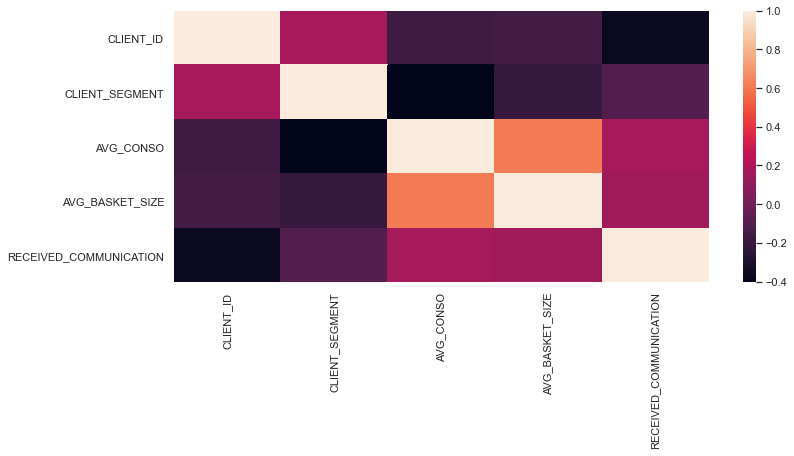

In [8]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

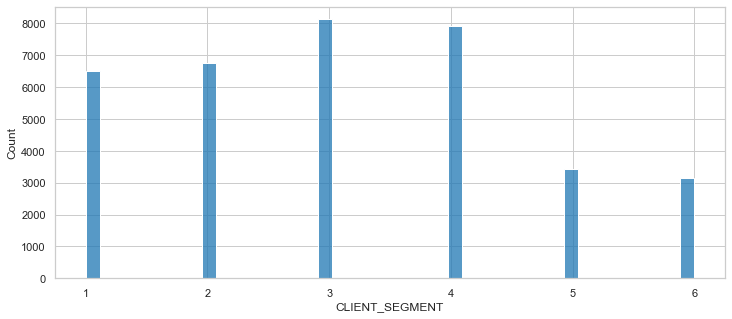

In [9]:
sns.histplot(clients['CLIENT_SEGMENT'])
plt.show()

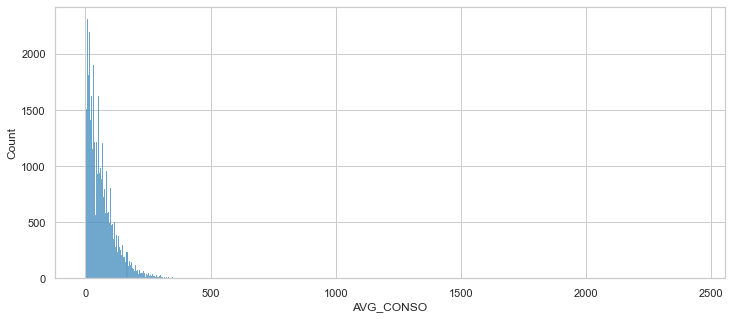

In [10]:
sns.histplot(clients['AVG_CONSO'])
plt.show()

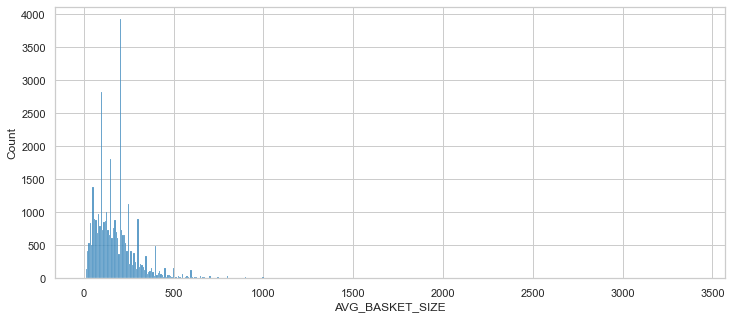

In [11]:
sns.histplot(clients['AVG_BASKET_SIZE'])
plt.show()

### Orders table analisis

*------------------------------------------------------------------------------------------------------------------------------------------*

**CLIENT ID:** Identificador único del cliente

**NB PRODS:** Número de 'prods' de la variedad de fruta en el pedido (1 prod = 10 piezas de fruta)

**ORDER ID:** Identificador único del pedido

**FRUIT_PRODUCT:** Variedad de fruta

*------------------------------------------------------------------------------------------------------------------------------------------*


In [12]:
orders.columns = [c.replace(' ', '_') for c in orders.columns]

In [13]:
orders.head(10)

,CLIENT_ID,NB_PRODS,ORDER_ID,FRUIT_PRODUCT
0,18070505,5,671907264,Apple
1,18070505,10,671907264,Orange
2,18070505,5,671907264,Kiwi
3,18070505,10,671907264,Pear
4,18070505,5,671907264,Cheery
5,18071016,5,675229714,Watermelon
6,18071016,10,675229714,Orange
7,18071016,10,675229714,Strawberry
8,18071016,5,675229714,Nectarine
9,18071016,15,675229714,Cheery


In [14]:
orders.describe()

,CLIENT_ID,NB_PRODS,ORDER_ID
count,6.691200e+04,66912.000000,6.691200e+04
mean,2.613407e+07,4.528112,6.722533e+08
std,8.473596e+06,5.788227,3.205826e+06
min,1.807050e+07,-80.000000,6.638335e+08
25%,2.017427e+07,1.000000,6.694803e+08
50%,2.438055e+07,3.000000,6.719971e+08
75%,2.538708e+07,5.000000,6.750893e+08
max,4.836586e+07,198.000000,6.832132e+08


In [15]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66912 entries, 0 to 66911
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CLIENT_ID      66912 non-null  int64 
 1   NB_PRODS       66912 non-null  int64 
 2   ORDER_ID       66912 non-null  int64 
 3   FRUIT_PRODUCT  66912 non-null  object
dtypes: int64(3), object(1)
memory usage: 2.0+ MB


In [16]:
orders["FRUIT_PRODUCT"].value_counts()

Kiwi           6431
Orange         5997
Lemon          5664
Cheery         4071
Nuwe Fruit     3688
Pear           3682
Nectarine      3520
Apple          3439
Banana         3408
Grape          3126
Coconut        2429
Apricot        2277
Devil Fruit    2173
Papaya         1944
Mango          1839
Plum           1788
Blueberry      1696
Lime           1656
Strawberry     1642
Pomegranate    1623
Watermelon     1411
Melon          1345
Pineapple      1273
Jackfruit       790
Name: FRUIT_PRODUCT, dtype: int64

## 3. Problem analisis

### Promotion evaluation

<AxesSubplot:xlabel='CLIENT_SEGMENT', ylabel='AVG_CONSO'>

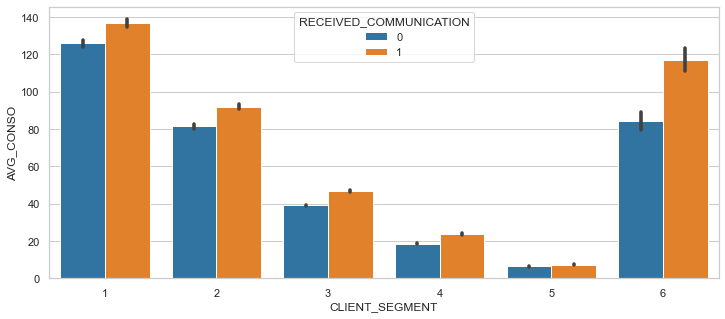

In [17]:
sns.barplot(data=clients, hue="RECEIVED_COMMUNICATION", x="CLIENT_SEGMENT", y='AVG_CONSO')

<AxesSubplot:xlabel='CLIENT_SEGMENT', ylabel='AVG_BASKET_SIZE'>

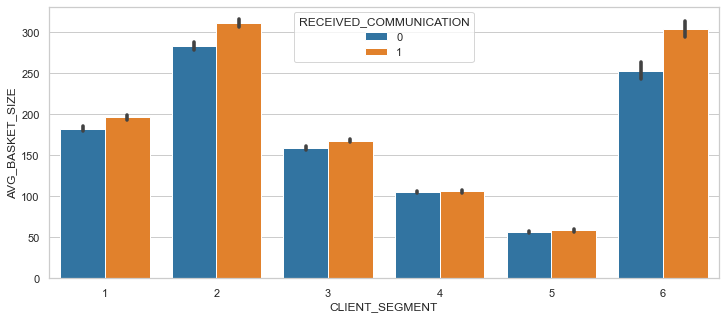

In [18]:
sns.barplot(data=clients, hue="RECEIVED_COMMUNICATION", x="CLIENT_SEGMENT", y='AVG_BASKET_SIZE')

We see an overall improvement on the sells with the promotion, however, client segment 4 and 5 are the ones with less improvement and also, the ones that buy less.

### CLIENTS ACTIVITIES

<AxesSubplot:xlabel='count', ylabel='FRUIT_PRODUCT'>

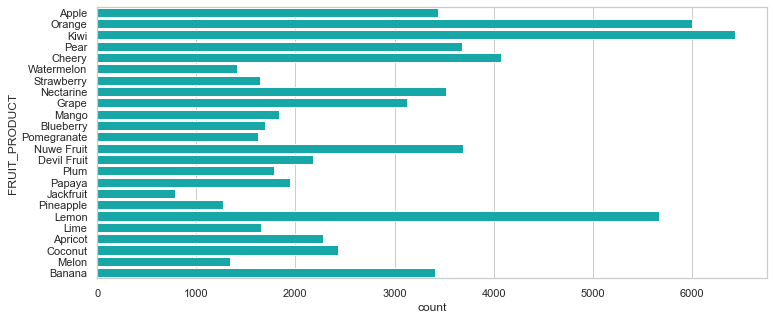

In [19]:
sns.countplot(y="FRUIT_PRODUCT", data=orders, color="c")

In [20]:
fruits = pd.pivot_table(orders.drop(columns='ORDER_ID'), index=['CLIENT_ID'], columns=['FRUIT_PRODUCT'])
clients_merged = fruits['NB_PRODS'].merge(clients, on='CLIENT_ID', how='right')

In [21]:
fruits_by_segment = pd.pivot_table(clients_merged, index=['CLIENT_SEGMENT'])
fruits_by_segment.head()

,AVG_BASKET_SIZE,AVG_CONSO,Apple,Apricot,Banana,Blueberry,CLIENT_ID,Cheery,Coconut,Devil Fruit,...,Nuwe Fruit,Orange,Papaya,Pear,Pineapple,Plum,Pomegranate,RECEIVED_COMMUNICATION,Strawberry,Watermelon
CLIENT_SEGMENT,,,,,,,,,,,,,,,,,,,,,
1,190.336475,132.278692,1.891846,4.773304,5.397556,2.764665,2.523566e+07,6.558648,5.188102,3.139037,...,5.617448,6.300329,4.520759,6.557143,3.233235,2.259784,3.264521,0.581399,3.908333,3.210398
2,298.595682,87.360251,2.328283,5.672553,6.830543,3.420949,2.495081e+07,8.788846,6.595895,3.558239,...,7.682997,7.694004,5.501299,7.913964,3.890374,2.881188,4.249723,0.562130,5.190994,3.985023
3,163.602114,43.331350,1.756763,3.406156,3.808435,2.226158,2.674234e+07,4.397371,3.515443,2.282201,...,4.137686,4.190794,3.563406,4.169656,2.721814,1.782982,2.537681,0.544626,3.078363,2.674847
4,105.475273,20.868018,1.533896,2.529551,2.677434,1.820466,2.881232e+07,3.179793,2.431818,1.850794,...,2.907104,2.878514,2.288136,3.080662,2.275401,1.526903,1.871855,0.446953,2.577957,2.138622
5,56.872805,6.600367,1.418491,2.113636,1.952055,1.561404,3.096971e+07,2.196296,1.700000,1.682927,...,2.016064,2.007874,2.351852,2.177419,1.883333,1.443038,1.703704,0.248469,1.692308,1.591549


In [22]:
fruits_by_segment = fruits_by_segment.drop(['AVG_BASKET_SIZE', 'AVG_CONSO','CLIENT_ID', 'RECEIVED_COMMUNICATION'], axis=1)

In [23]:
def plot_segment(i):
    
    fig = plt.figure(figsize = (10, 5))

    # creating the bar plot
    plt.bar([c[:3] for c in (list(fruits_by_segment.columns))], fruits_by_segment.iloc[i-1].values,
            width = 0.4)
    plt.title('Segment ' + str(i))
    plt.show()

In the next plots we can see what fruits are the most popular amongst every client segment. 

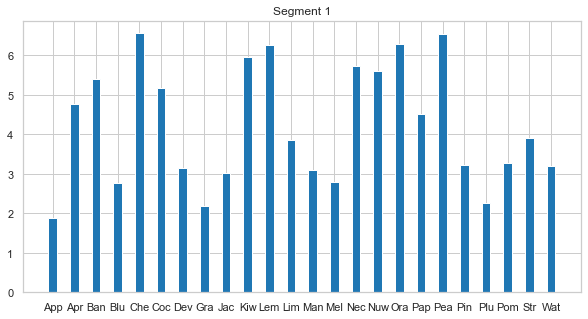

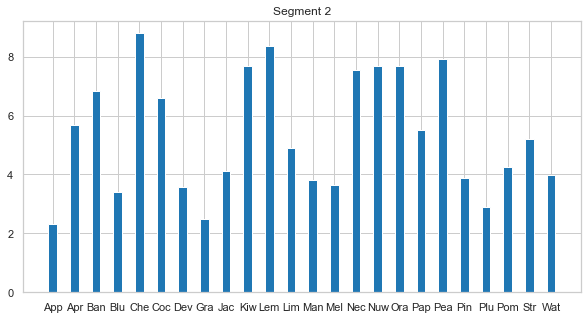

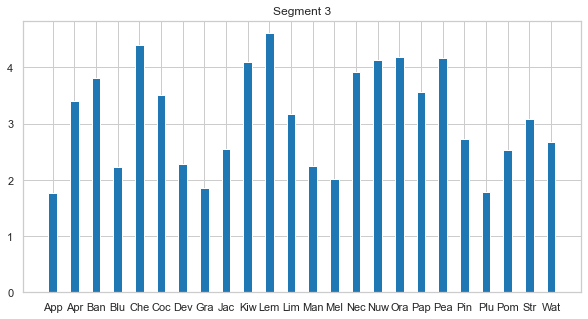

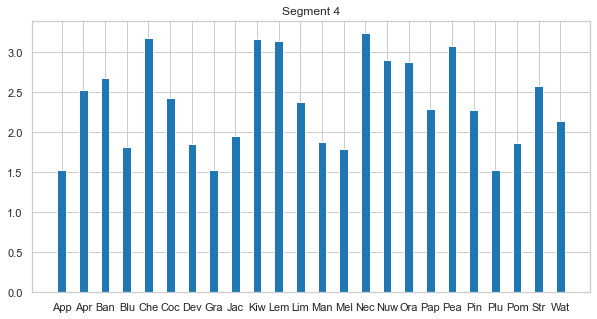

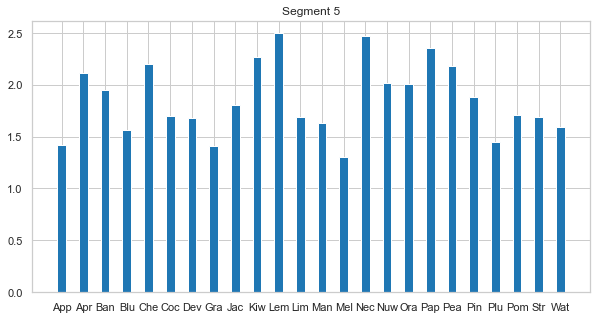

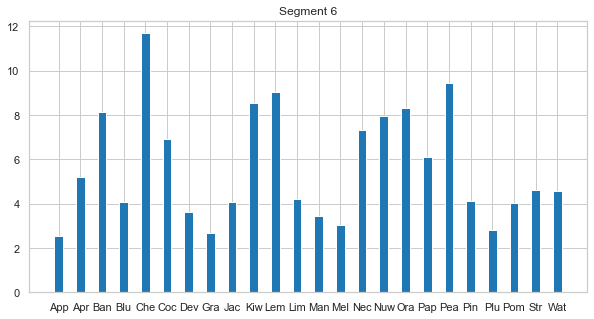

In [24]:
plot_segment(1)
plot_segment(2)
plot_segment(3)
plot_segment(4)
plot_segment(5)
plot_segment(6)

## 4. Preparing the data

In [25]:
clients = pd.read_csv('mwc22-client_table.csv', decimal=',')
clients.columns = [c.replace(' ', '_') for c in clients.columns]

In [26]:
clients['CLIENT_SEGMENT'] = clients['CLIENT_SEGMENT'] - 1
clients.shape

(35884, 5)

Let's split the data into 3 parts. The train set, the validation set which we will use to evaluate the models and the test set. It is recommended to evaluate the models on the validation set to make sure that we are not just overfitting the test when tweaking the model's parameters. Once we are happy with our models, we try them on the test set.

In [27]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(clients, test_size=0.2)
X_train, y_train = train_set.loc[:, train_set.columns!='CLIENT_SEGMENT'], train_set[['CLIENT_SEGMENT']]
X_test, y_test = test_set.loc[:, test_set.columns!='CLIENT_SEGMENT'], test_set[['CLIENT_SEGMENT']]

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

Let's do some feature engineering...

In [28]:
from sklearn.base import BaseEstimator, TransformerMixin

avg_conso, avg_basket_size = "AVG_CONSO", "AVG_BASKET_SIZE"

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
        
    def fit(self, X, y=None):
        return self  # nothing else to do
    
    def transform(self, X):
        average_units = X[avg_basket_size] / (1.0 + X[avg_conso])# add 1 to avoid 0 division
        return np.c_[X, average_units]



Let's make a pipeline so we can transform the data easily.

In [29]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import Pipeline
log_attribs = ["AVG_CONSO", "AVG_BASKET_SIZE"]
cat_attribs = ["RECEIVED_COMMUNICATION"]
num_attribs = log_attribs

log_pipe = Pipeline([
        ('attribs_adder', CombinedAttributesAdder()),
        ('log',FunctionTransformer(np.log1p, validate=True)),
        ('std_scaler', StandardScaler()),
    ])

num_pipe = Pipeline([
        ('attribs_adder', CombinedAttributesAdder()),
        ('log',FunctionTransformer(np.log1p, validate=True)),
        ('rob_scaler', RobustScaler()),
    ])

cat_pipe = Pipeline([
        ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore')),
    ])

full_pipe = ColumnTransformer([
        #('log', log_pipe, log_attribs),
        ('num', num_pipe, num_attribs),
        ('log', log_pipe, log_attribs),
        ('cat', cat_pipe, cat_attribs),
    ])

X_train = full_pipe.fit_transform(X_train)
X_val = full_pipe.transform(X_val) # NOTE: We are NOT fitting. Only learn from training set.
X_test = full_pipe.transform(X_test) # NOTE: We are NOT fitting. Only learn from training set.


## 5. Prediction model

Let's start trying some models


In [30]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

### Linear regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=1000)

In [32]:
scores = cross_val_score(lr, X_val, y_val.values.ravel(), 
                         scoring=make_scorer(f1_score, average='macro'), 
                         cv=10)
display_scores(scores)

Scores: [0.66532847 0.6077898  0.66658432 0.66792367 0.65296752 0.65934134
 0.67717891 0.67748718 0.64533941 0.66191989]
Mean: 0.6581860517336051
Standard deviation: 0.019227470834874524


### KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=24)
knn.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=24)

In [34]:
scores = cross_val_score(knn, X_val, y_val.values.ravel(),
                         scoring=make_scorer(f1_score, average='macro'), 
                         cv=10)
display_scores(scores)

Scores: [0.70092766 0.69175946 0.66873908 0.68861403 0.70690372 0.68881901
 0.69831222 0.70558663 0.70460753 0.6918404 ]
Mean: 0.6946109723230962
Standard deviation: 0.010861765451082268


### Naive Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train.values.ravel())

GaussianNB()

In [36]:
scores = cross_val_score(nb, X_val, y_val.values.ravel(),                      
                         scoring=make_scorer(f1_score, average='macro'), 
                         cv=10)
display_scores(scores)

Scores: [0.64910124 0.65549983 0.67362846 0.68950645 0.69887764 0.67057178
 0.70130365 0.6942226  0.66364683 0.66477922]
Mean: 0.6761137681857615
Standard deviation: 0.01770710456043242


### Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=8, random_state=0, n_estimators = 220, max_features=2)
clf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_depth=8, max_features=2, n_estimators=220,
                       random_state=0)

In [38]:
scores = cross_val_score(clf, X_val, y_val.values.ravel(),
                        scoring=make_scorer(f1_score, average='macro'), 
                        cv=10)
display_scores(scores)

Scores: [0.70858625 0.68112169 0.68449801 0.70213601 0.68635126 0.71376272
 0.72600117 0.72844014 0.6931188  0.67330498]
Mean: 0.6997321030750118
Standard deviation: 0.01815171747804754


### Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=8, random_state=0)
dtree.fit(X_train, y_train.values.ravel())

DecisionTreeClassifier(max_depth=8, random_state=0)

In [40]:
scores = cross_val_score(dtree, X_val, y_val.values.ravel(),                          
                         scoring=make_scorer(f1_score, average='macro'), 
                         cv=10)
display_scores(scores)

Scores: [0.70461586 0.66572506 0.68308648 0.69077947 0.69134076 0.7238221
 0.70229439 0.73892746 0.67880713 0.66615567]
Mean: 0.6945554366291926
Standard deviation: 0.022424079725929233


### SVC

In [41]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

svm = LinearSVC(random_state=0, dual=False)
svm.fit(X_train, y_train.values.ravel())

LinearSVC(dual=False, random_state=0)

In [42]:
scores = cross_val_score(svm, X_val, y_val.values.ravel(),                          
                         scoring=make_scorer(f1_score, average='macro'), 
                         cv=10)
display_scores(scores)

Scores: [0.58021974 0.52837758 0.55778188 0.57406742 0.58280968 0.56445941
 0.58432895 0.56990325 0.55116136 0.57602699]
Mean: 0.5669136257721117
Standard deviation: 0.01642793766693403


### SGD

SGD classifiers usually performs well with a lot of data, which is not our case. However, let's give it a try.

In [43]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='modified_huber', random_state=0)
sgd.fit(X_train, y_train.values.ravel())

SGDClassifier(loss='modified_huber', random_state=0)

In [44]:
y_pred = sgd.predict(X_test)
print(y_pred)
scores = cross_val_score(sgd, X_val, y_val.values.ravel(), 
                         scoring=make_scorer(f1_score, average='macro'), 
                         cv=10)
display_scores(scores)

[3 0 1 ... 1 3 0]
Scores: [0.48377811 0.45246348 0.49866199 0.43537593 0.44317405 0.51312651
 0.52482288 0.42889777 0.42496801 0.46303691]
Mean: 0.46683056215870744
Standard deviation: 0.03430463855766112


## 6. Autotunning

We have a some models that look very promising. RandomForest and KNN did very well on the validation set. Let's find the best parameters for these models so we get the best performance.

### Random Forest

In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [220, 250, 300], 'max_features': [1,3,5], 'max_depth':[7,8,9,10]},
    {'bootstrap':[False], 'n_estimators': [220, 250, 300], 'max_features': [1,3,5], 'max_depth':[7,8,9,10]},
  ]

In [46]:
forest_cl = RandomForestClassifier(random_state=0)
grid_search = GridSearchCV(forest_cl, param_grid, cv=5,
                           scoring=make_scorer(f1_score, average='macro'),
                           return_train_score=True,
                           n_jobs=-1)

grid_search.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid=[{'max_depth': [7, 8, 9, 10], 'max_features': [1, 3, 5],
                          'n_estimators': [220, 250, 300]},
                         {'bootstrap': [False], 'max_depth': [7, 8, 9, 10],
                          'max_features': [1, 3, 5],
                          'n_estimators': [220, 250, 300]}],
             return_train_score=True,
             scoring=make_scorer(f1_score, average=macro))

In [47]:
print("the best parameters are:")
print(grid_search.best_params_)
print("Best Score", grid_search.best_score_)

the best parameters are:
{'bootstrap': False, 'max_depth': 9, 'max_features': 5, 'n_estimators': 220}
Best Score 0.6933369654336333


In [48]:
r = pd.DataFrame(grid_search.cv_results_)
r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.388978,0.013773,0.149735,0.001857,7,1,220,NaN,"{'max_depth': 7, 'max_features': 1, 'n_estimat...",0.681821,...,0.687160,0.003437,65,0.696753,0.693454,0.698883,0.698399,0.695705,0.696639,0.001958
1,2.724885,0.019904,0.181766,0.003075,7,1,250,NaN,"{'max_depth': 7, 'max_features': 1, 'n_estimat...",0.681832,...,0.687160,0.003527,64,0.696620,0.693419,0.698801,0.698906,0.695838,0.696717,0.002040
2,3.277385,0.058651,0.211393,0.020477,7,1,300,NaN,"{'max_depth': 7, 'max_features': 1, 'n_estimat...",0.681453,...,0.686593,0.003482,69,0.696266,0.693460,0.699236,0.698812,0.695666,0.696688,0.002128
3,3.901553,0.072472,0.148535,0.009402,7,3,220,NaN,"{'max_depth': 7, 'max_features': 3, 'n_estimat...",0.681569,...,0.685238,0.004014,70,0.699668,0.696050,0.700237,0.700631,0.697697,0.698857,0.001728
4,4.454258,0.061078,0.178363,0.016848,7,3,250,NaN,"{'max_depth': 7, 'max_features': 3, 'n_estimat...",0.681777,...,0.685225,0.003800,71,0.699756,0.695605,0.699971,0.700357,0.697488,0.698635,0.001817


In [49]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.6871595048330104 {'max_depth': 7, 'max_features': 1, 'n_estimators': 220}
0.6871599840682003 {'max_depth': 7, 'max_features': 1, 'n_estimators': 250}
0.6865928560814969 {'max_depth': 7, 'max_features': 1, 'n_estimators': 300}
0.6852383792097628 {'max_depth': 7, 'max_features': 3, 'n_estimators': 220}
0.6852247720467277 {'max_depth': 7, 'max_features': 3, 'n_estimators': 250}
0.6849127795664666 {'max_depth': 7, 'max_features': 3, 'n_estimators': 300}
0.6871716022517516 {'max_depth': 7, 'max_features': 5, 'n_estimators': 220}
0.6873019989908553 {'max_depth': 7, 'max_features': 5, 'n_estimators': 250}
0.6870293341483745 {'max_depth': 7, 'max_features': 5, 'n_estimators': 300}
0.6904653571698904 {'max_depth': 8, 'max_features': 1, 'n_estimators': 220}
0.6900457696309591 {'max_depth': 8, 'max_features': 1, 'n_estimators': 250}
0.689687124883714 {'max_depth': 8, 'max_features': 1, 'n_estimators': 300}
0.6891492630232121 {'max_depth': 8, 'max_features': 3, 'n_estimators': 220}
0.68899562945

In [50]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.28436444, 0.04725078, 0.15017044, 0.30024384, 0.04640207,
       0.13982236, 0.01603469, 0.01571137])

### KNN

In [51]:
scores_list = []
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train.values.ravel())
    scores = cross_val_score(knn, X_val, y_val.values.ravel(),
                         scoring=make_scorer(f1_score, average='macro'), 
                         cv=10)
    scores_list.append((scores.mean(), i))
    
scores_list = sorted(scores_list,reverse=True)
scores_list

[(0.702729509591709, 9),
 (0.6985094753912143, 11),
 (0.6977558561012459, 25),
 (0.6970154602541097, 17),
 (0.6968204468070871, 8),
 (0.6965773775831409, 29),
 (0.6962552208520414, 30),
 (0.6960804649673963, 18),
 (0.6954512427735916, 35),
 (0.6953555891796581, 37),
 (0.6952824544368482, 27),
 (0.6949381853970014, 21),
 (0.6949102061501324, 31),
 (0.6948964223297465, 32),
 (0.6946849366055358, 26),
 (0.6946109723230962, 24),
 (0.6946073953494198, 39),
 (0.6944344864107477, 38),
 (0.6944155836628663, 22),
 (0.6943904641906988, 23),
 (0.6942601317375094, 19),
 (0.6942532185991311, 13),
 (0.6939048721106353, 33),
 (0.6938865456368776, 16),
 (0.6937418587900045, 15),
 (0.693386929832759, 34),
 (0.6933806768227582, 12),
 (0.693271387495126, 28),
 (0.6930891261714164, 43),
 (0.6929003777150051, 10),
 (0.6926890981571112, 14),
 (0.6926501932471703, 20),
 (0.6923117716611645, 36),
 (0.6921523455223306, 7),
 (0.692078014900394, 69),
 (0.6919551786948122, 40),
 (0.6919307332738379, 41),
 (0.6915

In [52]:
knn = KNeighborsClassifier(n_neighbors=scores_list[0][1])
knn.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=9)

In [53]:
y_pred = knn.predict(X_val)
print(knn.__class__.__name__, f1_score(y_val, y_pred, average='macro'))

KNeighborsClassifier 0.6960947987436167


## 7. Ensemble methods

We have two candidates that look very promising (KNN and Random Forest). Let's try if ensambling models can perform better.

### Gradient Boosting

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=1, random_state=0)
gbc.fit(X_train, y_train.values.ravel())

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [55]:
scores = cross_val_score(gbc, X_val, y_val.values.ravel(),                          
                         scoring=make_scorer(f1_score, average='macro'), 
                         cv=10)
display_scores(scores)

Scores: [0.64917811 0.56065016 0.66701372 0.67678669 0.69901616 0.53953967
 0.70914998 0.70331299 0.685327   0.66057329]
Mean: 0.6550547755380356
Standard deviation: 0.05571392228580287


### Adaboost

In [56]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
DecisionTreeClassifier(max_depth=7), n_estimators=200,
algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train, y_train.values.ravel())

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=7),
                   learning_rate=0.5, n_estimators=200)

In [57]:
scores = cross_val_score(ada_clf, X_val, y_val.values.ravel(),                          
                         scoring=make_scorer(f1_score, average='macro'), 
                         cv=10, n_jobs=-1)
display_scores(scores)

Scores: [0.6755789  0.57971234 0.6008059  0.63917686 0.64203874 0.66201679
 0.6311973  0.65781051 0.63896168 0.65508686]
Mean: 0.6382385886417815
Standard deviation: 0.027420025665039066


### Voting

In [58]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
estimators=[('lr', lr), ('dtree', dtree),
            ('ada_clf', ada_clf), ('gbc', gbc),
            ('nb', nb), ('clf', clf), ('knn', knn)], voting='soft')
voting_clf.fit(X_train, y_train.values.ravel())

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('dtree',
                              DecisionTreeClassifier(max_depth=8,
                                                     random_state=0)),
                             ('ada_clf',
                              AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=7),
                                                 learning_rate=0.5,
                                                 n_estimators=200)),
                             ('gbc',
                              GradientBoostingClassifier(learning_rate=1.0,
                                                         max_depth=1,
                                                         random_state=0)),
                             ('nb', GaussianNB()),
                             ('clf',
                              RandomForestClassifier(max_depth=8,
                                                     max_feat

In [59]:
from sklearn.metrics import f1_score
for cf in (lr, clf, dtree, gbc, ada_clf, knn, svm, nb, voting_clf):
    cf.fit(X_train, y_train.values.ravel())
    y_pred = cf.predict(X_val)
    print(cf.__class__.__name__, f1_score(y_val, y_pred, average='macro'))

LogisticRegression 0.6595023563881897
RandomForestClassifier 0.698443246499798
DecisionTreeClassifier 0.6969669989491286
GradientBoostingClassifier 0.6830586000483915
AdaBoostClassifier 0.5912334004211522
KNeighborsClassifier 0.6960947987436167
LinearSVC 0.5568518545487483
GaussianNB 0.6767484204153037
VotingClassifier 0.7016765067307391


Voting looks very promising!

## 8. TEST

At this point random forest, voting and knn performed better than the rest of the classifiers in the validation set. Let's test them with the best parameters on the test set and choose the best!

### Random Forest

In [60]:
clf = RandomForestClassifier(max_depth=grid_search.best_params_["max_depth"],
                             random_state=0,
                             max_features=grid_search.best_params_["max_features"],
                             n_estimators=grid_search.best_params_["n_estimators"],)
clf.fit(X_train, y_train.values.ravel())


RandomForestClassifier(max_depth=9, max_features=5, n_estimators=220,
                       random_state=0)

In [61]:
pred = clf.predict(X_test)
scores = cross_val_score(clf, X_test, y_test.values.ravel(), scoring=make_scorer(f1_score, average='macro'),
                         cv=10)
display_scores(scores)

Scores: [0.68857128 0.69095407 0.71284091 0.69316885 0.68138815 0.69341713
 0.67386498 0.68727659 0.6673235  0.66367631]
Mean: 0.6852481772500596
Standard deviation: 0.013673547548991217


### Voting

In [62]:
scores = cross_val_score(voting_clf, X_test, y_test.values.ravel(),
                         scoring=make_scorer(f1_score, average='macro'),
                         cv=10,
                         n_jobs=-1)
display_scores(scores)

Scores: [0.69266242 0.69285575 0.71149185 0.70664715 0.67305668 0.70489569
 0.69285345 0.69029701 0.67103162 0.66622825]
Mean: 0.6902019874581233
Standard deviation: 0.01481872714567316


### KNN

In [63]:
scores = cross_val_score(knn, X_test, y_test.values.ravel(), scoring=make_scorer(f1_score, average='macro'),
                         cv=10)
display_scores(scores)

Scores: [0.69107657 0.67719334 0.69000148 0.68178223 0.67709126 0.70021381
 0.65609052 0.69183773 0.67464588 0.65482987]
Mean: 0.6794762689011018
Standard deviation: 0.014220009907029638


Voting performs slighly better than Random forest and knn. This is our best model. Let's generate the submission.

# Submission

In [64]:
submission_x = pd.read_csv('mwc22-client_table+-+test_x.csv', decimal=',')
submission_x.columns = [c.replace(' ', '_') for c in submission_x.columns]
submission_x_tr = full_pipe.transform(submission_x)
y_pred = voting_clf.predict(submission_x_tr)

In [65]:
d = {'CLIENT ID': submission_x["CLIENT_ID"], 'CLIENT SEGMENT': y_pred}
df_output = pd.DataFrame(data=d)
df_output = df_output.reset_index(drop=True)
df_output['CLIENT SEGMENT'] = df_output['CLIENT SEGMENT'] + 1
df_output.to_csv('results.csv', index=False)

In [66]:
df_output

,CLIENT ID,CLIENT SEGMENT
0,48352078,5
1,18072186,1
2,48352246,3
3,18070621,4
4,48352262,4
5,48359553,4
6,18071647,4
7,48359574,3
8,48359627,4
9,18070505,1
